In [9]:
import os
import numpy as np
import emgfit
import matplotlib.pyplot as plt

print("emgfit version: ",emgfit.__version__)
print("numpy version:", np.version.version)

# Change the dpi back to 600, because it probably works better like this on Jupyter.

datadir = "TRC_76u"

fids = os.listdir(os.getcwd()+os.sep+datadir)
fids = [i for i in fids if ".txt" in i]

hdata = [dict() for i in fids]
nskip = 23

emgfit version:  0.3.7
numpy version: 1.20.1


In [3]:
# Import data from headers
for idx,fid in enumerate(fids):
    with open(os.getcwd()+os.sep+datadir+os.sep+fid) as fh:
        head = [next(fh) for i in range(18)]
        minMass = float(head[4].split(":")[-1].split()[0])
        maxMass = float(head[5].split(":")[-1].split()[0])
        nSpect = float(head[3].split(":")[-1].split()[0])
    hdata[idx]["minimum mass"] = minMass
    hdata[idx]["maximum mass"] = maxMass
    hdata[idx]["number of spectra"] = nSpect

In [4]:
specdata = [[] for i in fids]
for idx, dset in enumerate(fids):
    specdata[idx] = emgfit.spectrum(os.getcwd()+os.sep+datadir+os.sep+fid, hdata[idx]["minimum mass"], hdata[idx]["maximum mass"], skiprows=nskip, show_plot=False)



Analysis of spectra: Sr76_2-20_055_clipped_4B_extmedian_onRb85_756T_clipped.txt


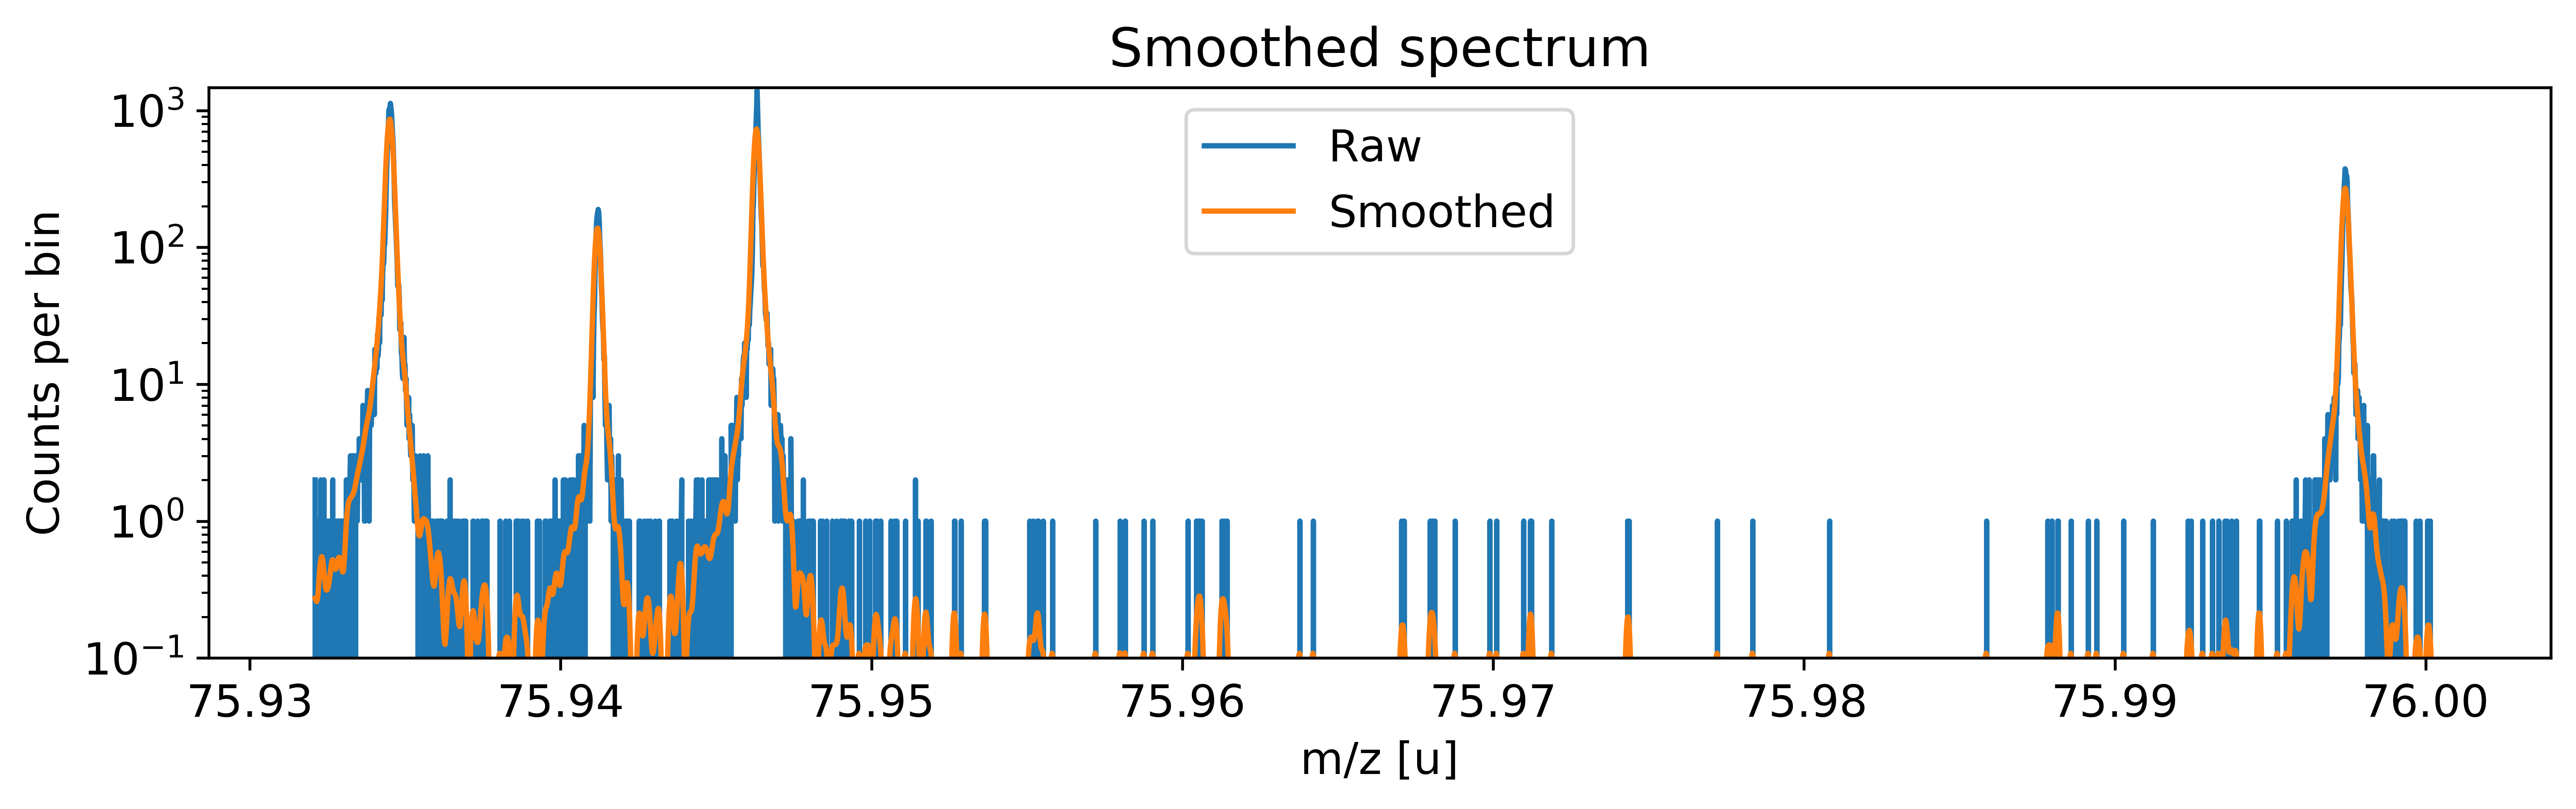

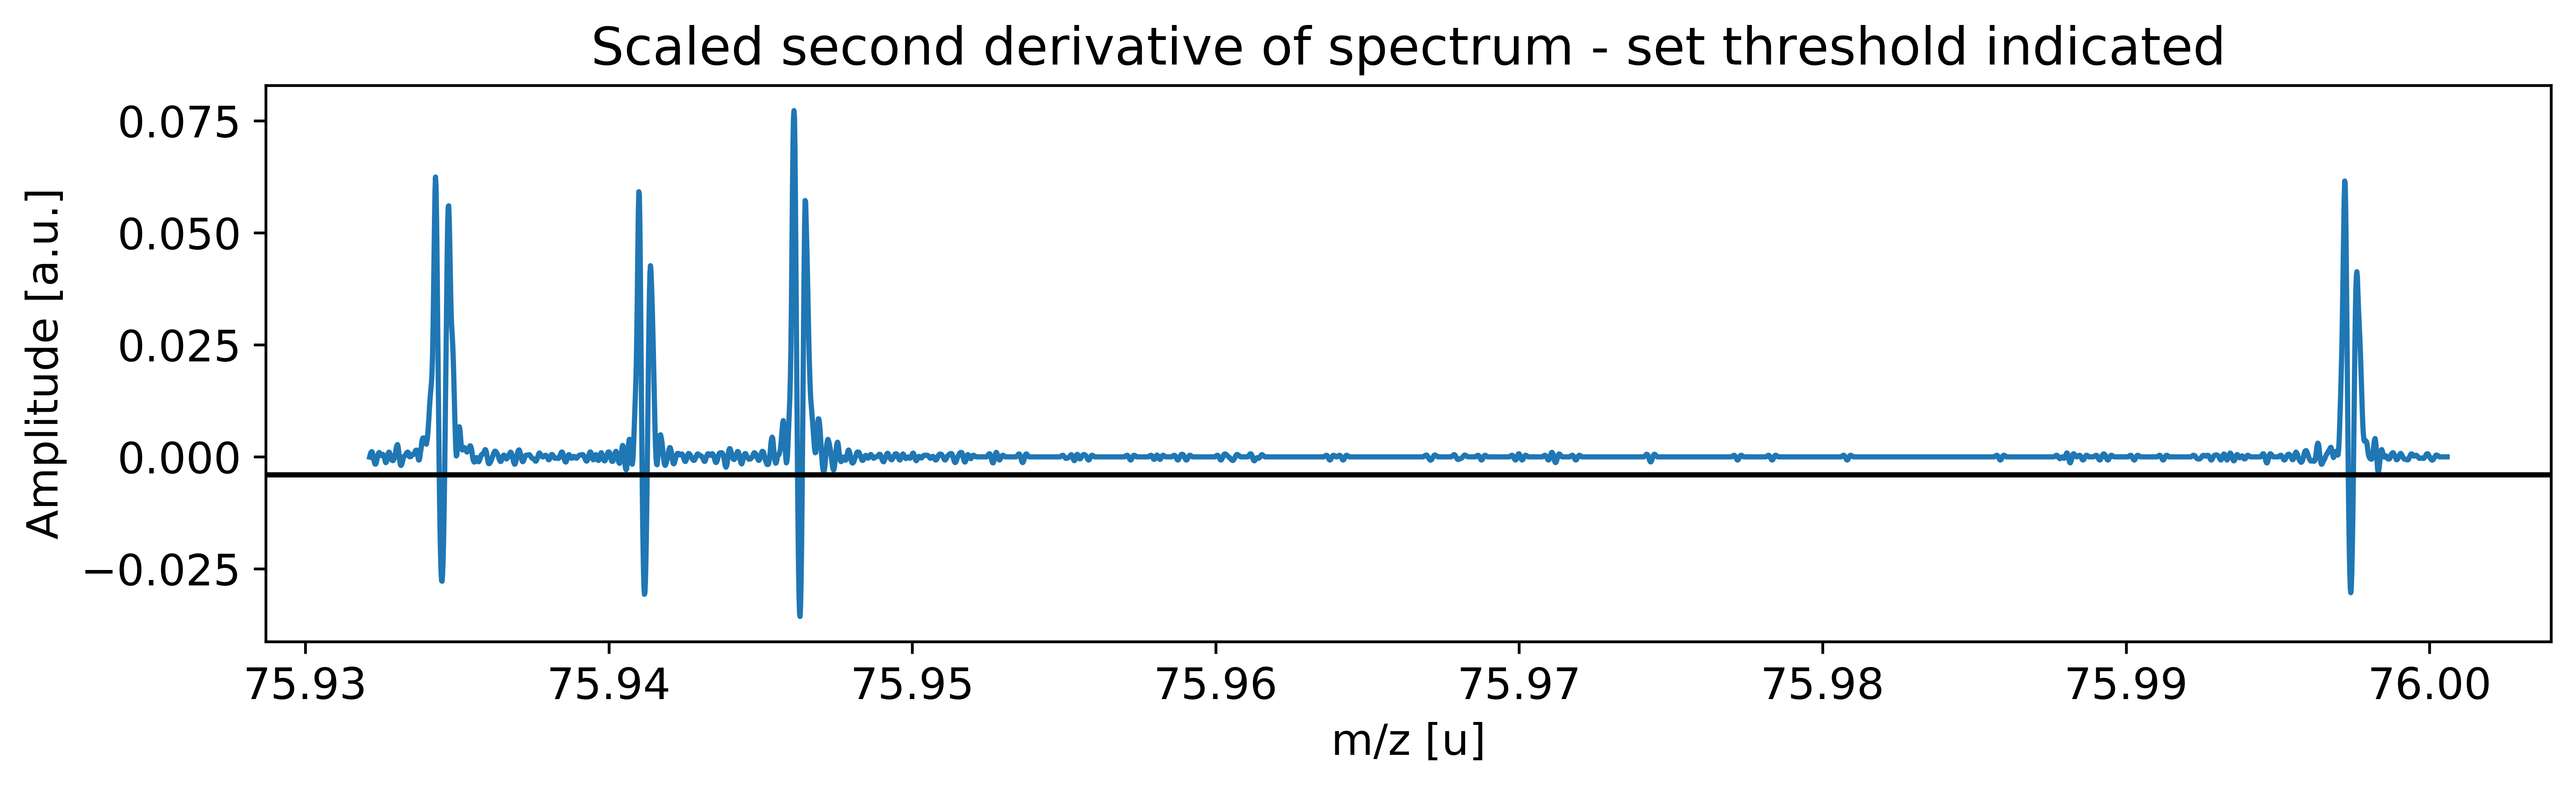

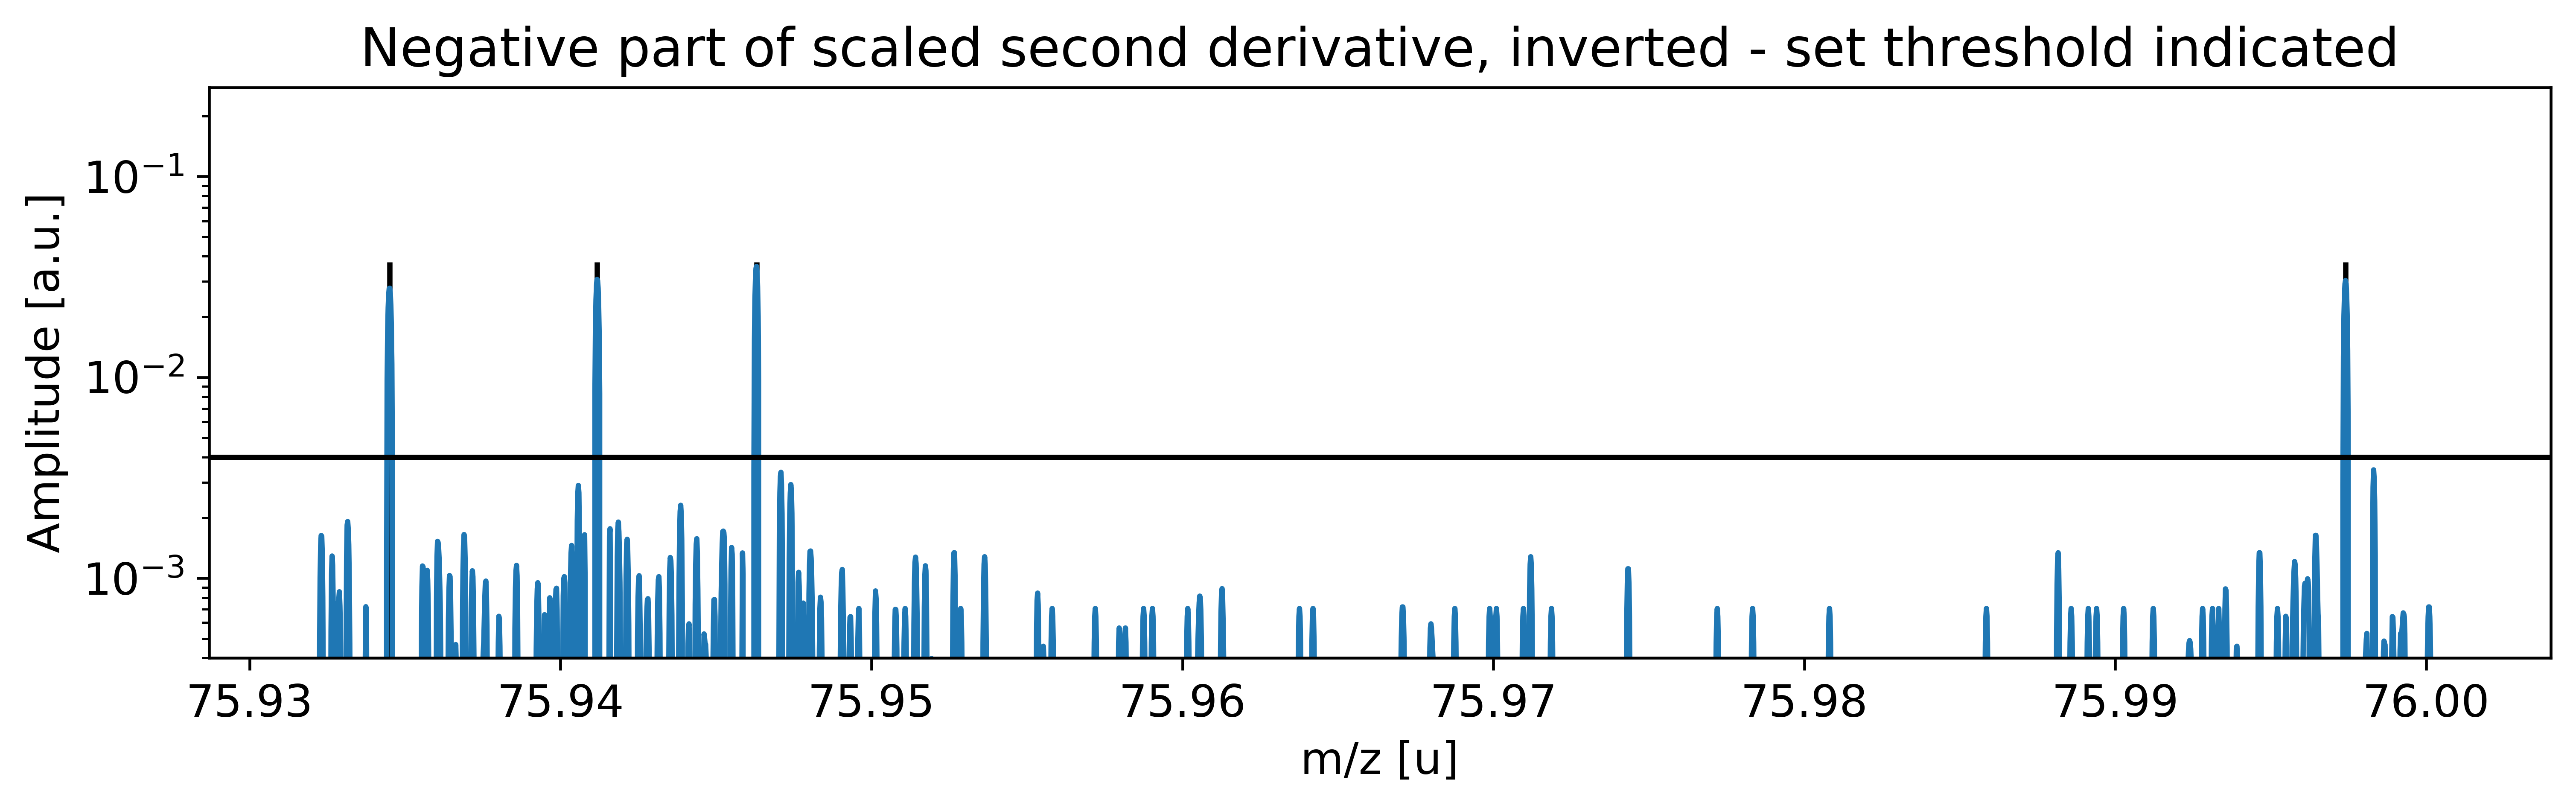

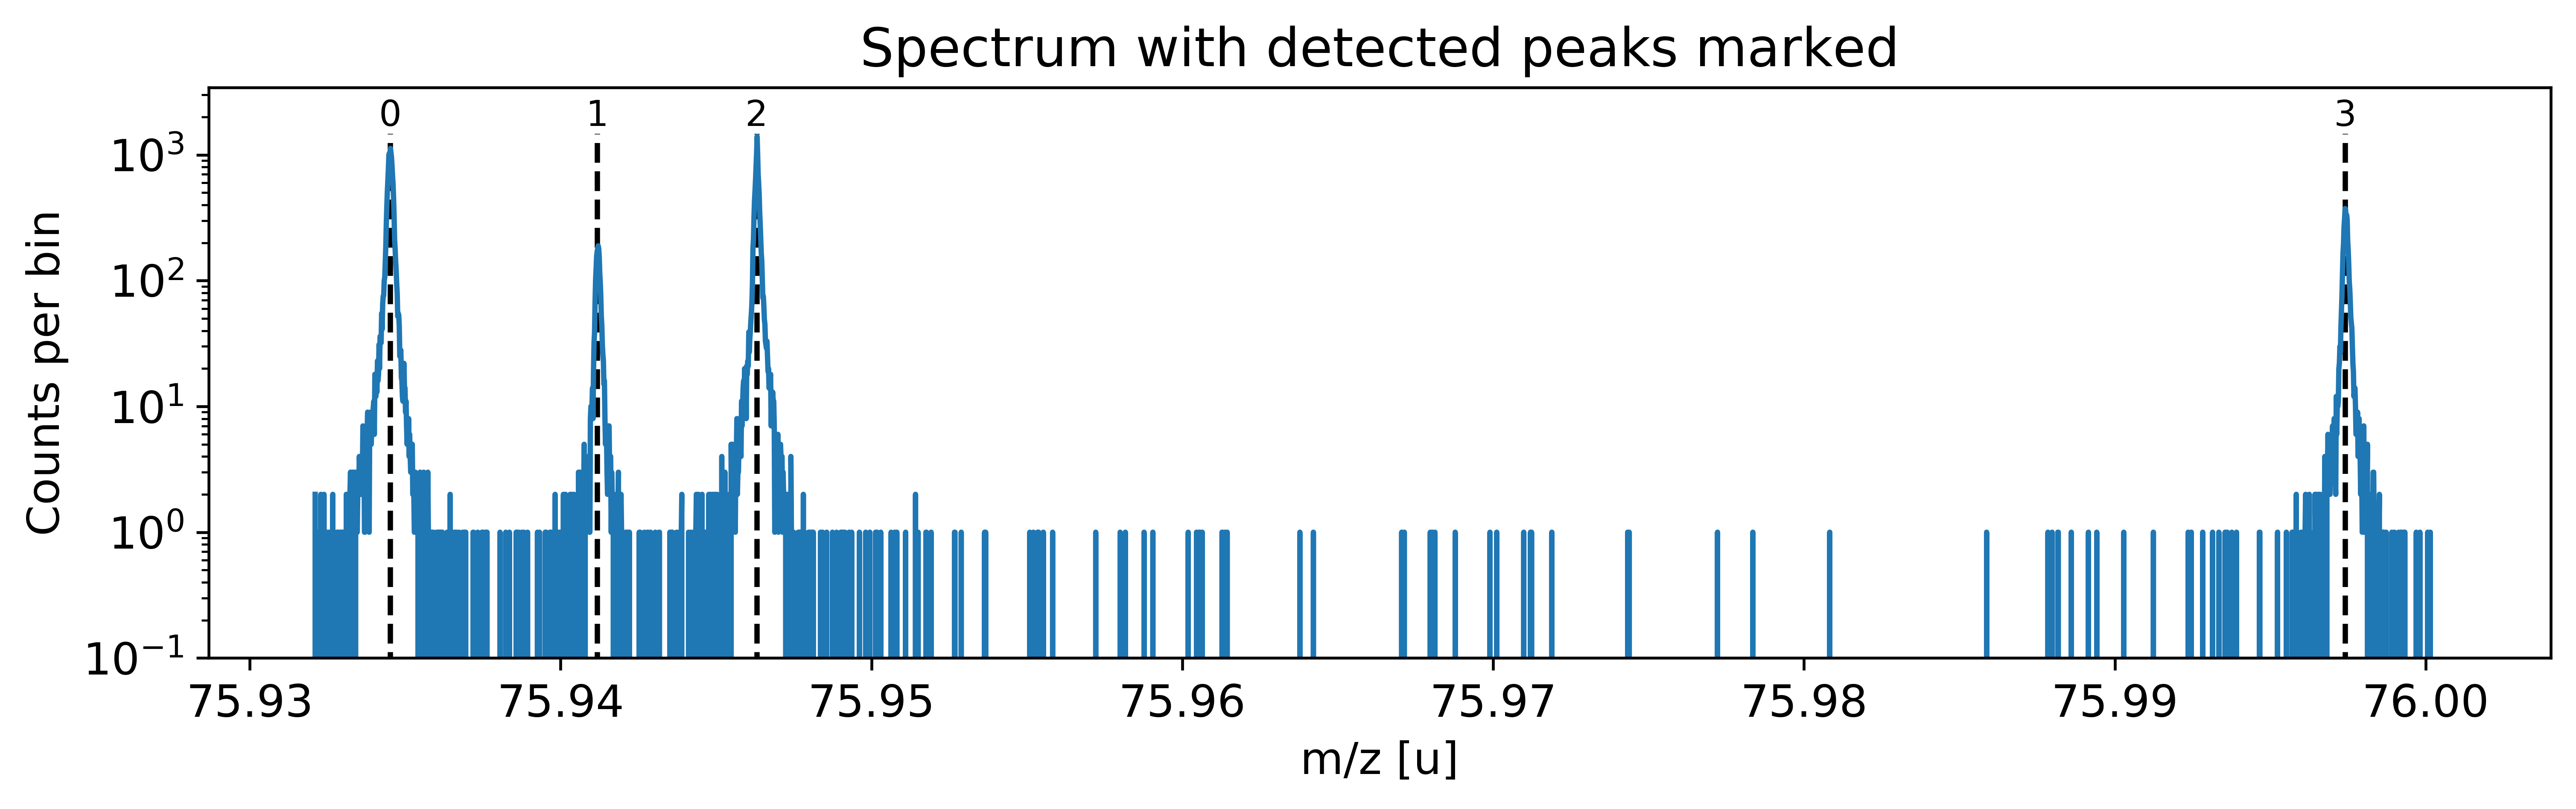

Peak properties table after peak detection:


,x_pos,species,comment,A,z,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,atomic_ME_keV,mass_error_keV,m_dev_keV
0,75.934509,?,-,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None
1,75.941175,?,-,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None
2,75.946304,?,-,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None
3,75.997406,?,-,None,None,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None


In [5]:
# Start working with each spectrum in specdata
print("Analysis of spectra: "+fids[0])
specdata[0].detect_peaks(thres=4e-3)

In [6]:
specdata[0].assign_species(["Rb76:-1e","Sr76:-1e","Rb85:-1e","Rb87:-1e"])
specdata[0].add_peak_comment("Used as TDC calibrant", peak_index=2, overwrite=True)
specdata[0].show_peak_properties()

Species of peak 0 assigned as Rb76:-1e
Species of peak 1 assigned as Sr76:-1e
Species of peak 2 assigned as Rb85:-1e
Species of peak 3 assigned as Rb87:-1e
Comment of peak 2 was changed to:  Used as TDC calibrant


,x_pos,species,comment,A,z,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_ion,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,atomic_ME_keV,mass_error_keV,m_dev_keV
0,75.934509,Rb76:-1e,-,76,1,75.934524,0.000001,False,None,None,None,None,None,None,None,None,None,None,None,None,None
1,75.941175,Sr76:-1e,-,76,1,75.941214,0.000037,False,None,None,None,None,None,None,None,None,None,None,None,None,None
2,75.946304,Rb85:-1e,Used as TDC calibrant,85,1,84.911241,0.000000,False,None,None,None,None,None,None,None,None,None,None,None,None,None
3,75.997406,Rb87:-1e,-,87,1,86.908632,0.000000,False,None,None,None,None,None,None,None,None,None,None,None,None,None


In [7]:
specdata[0].plot(xmin=75.932, xmax=75.938)


##### Determine optimal tail order #####


### Fitting data with Gaussian ###---------------------------------------------------------------------------------------------



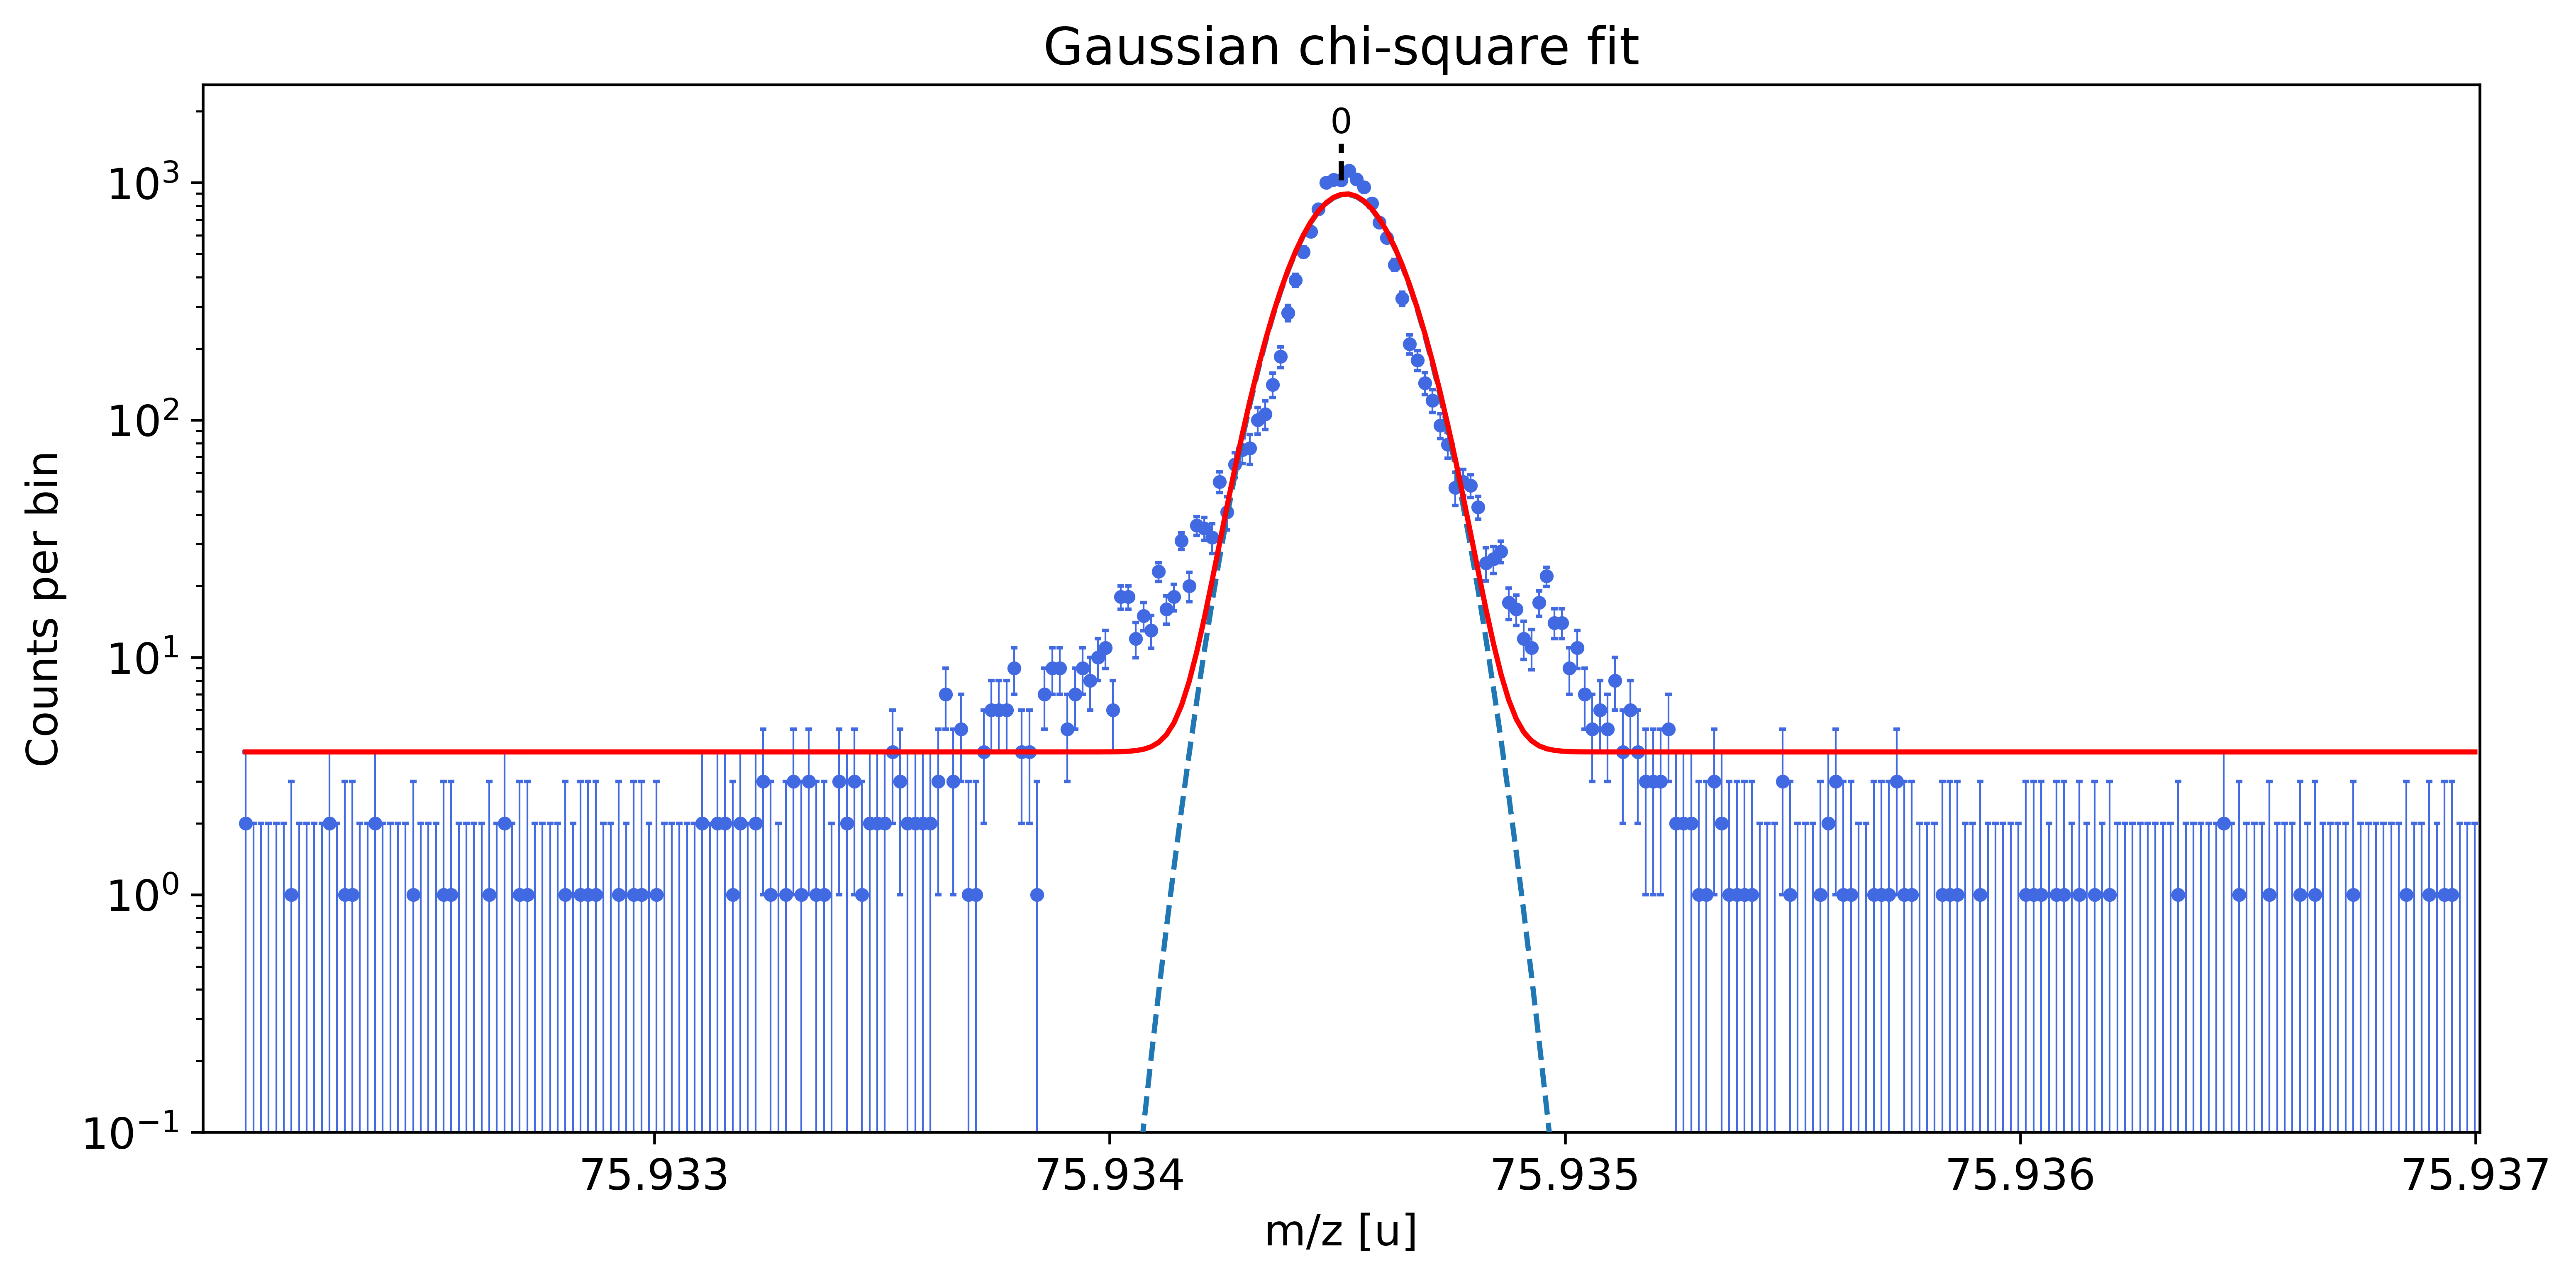

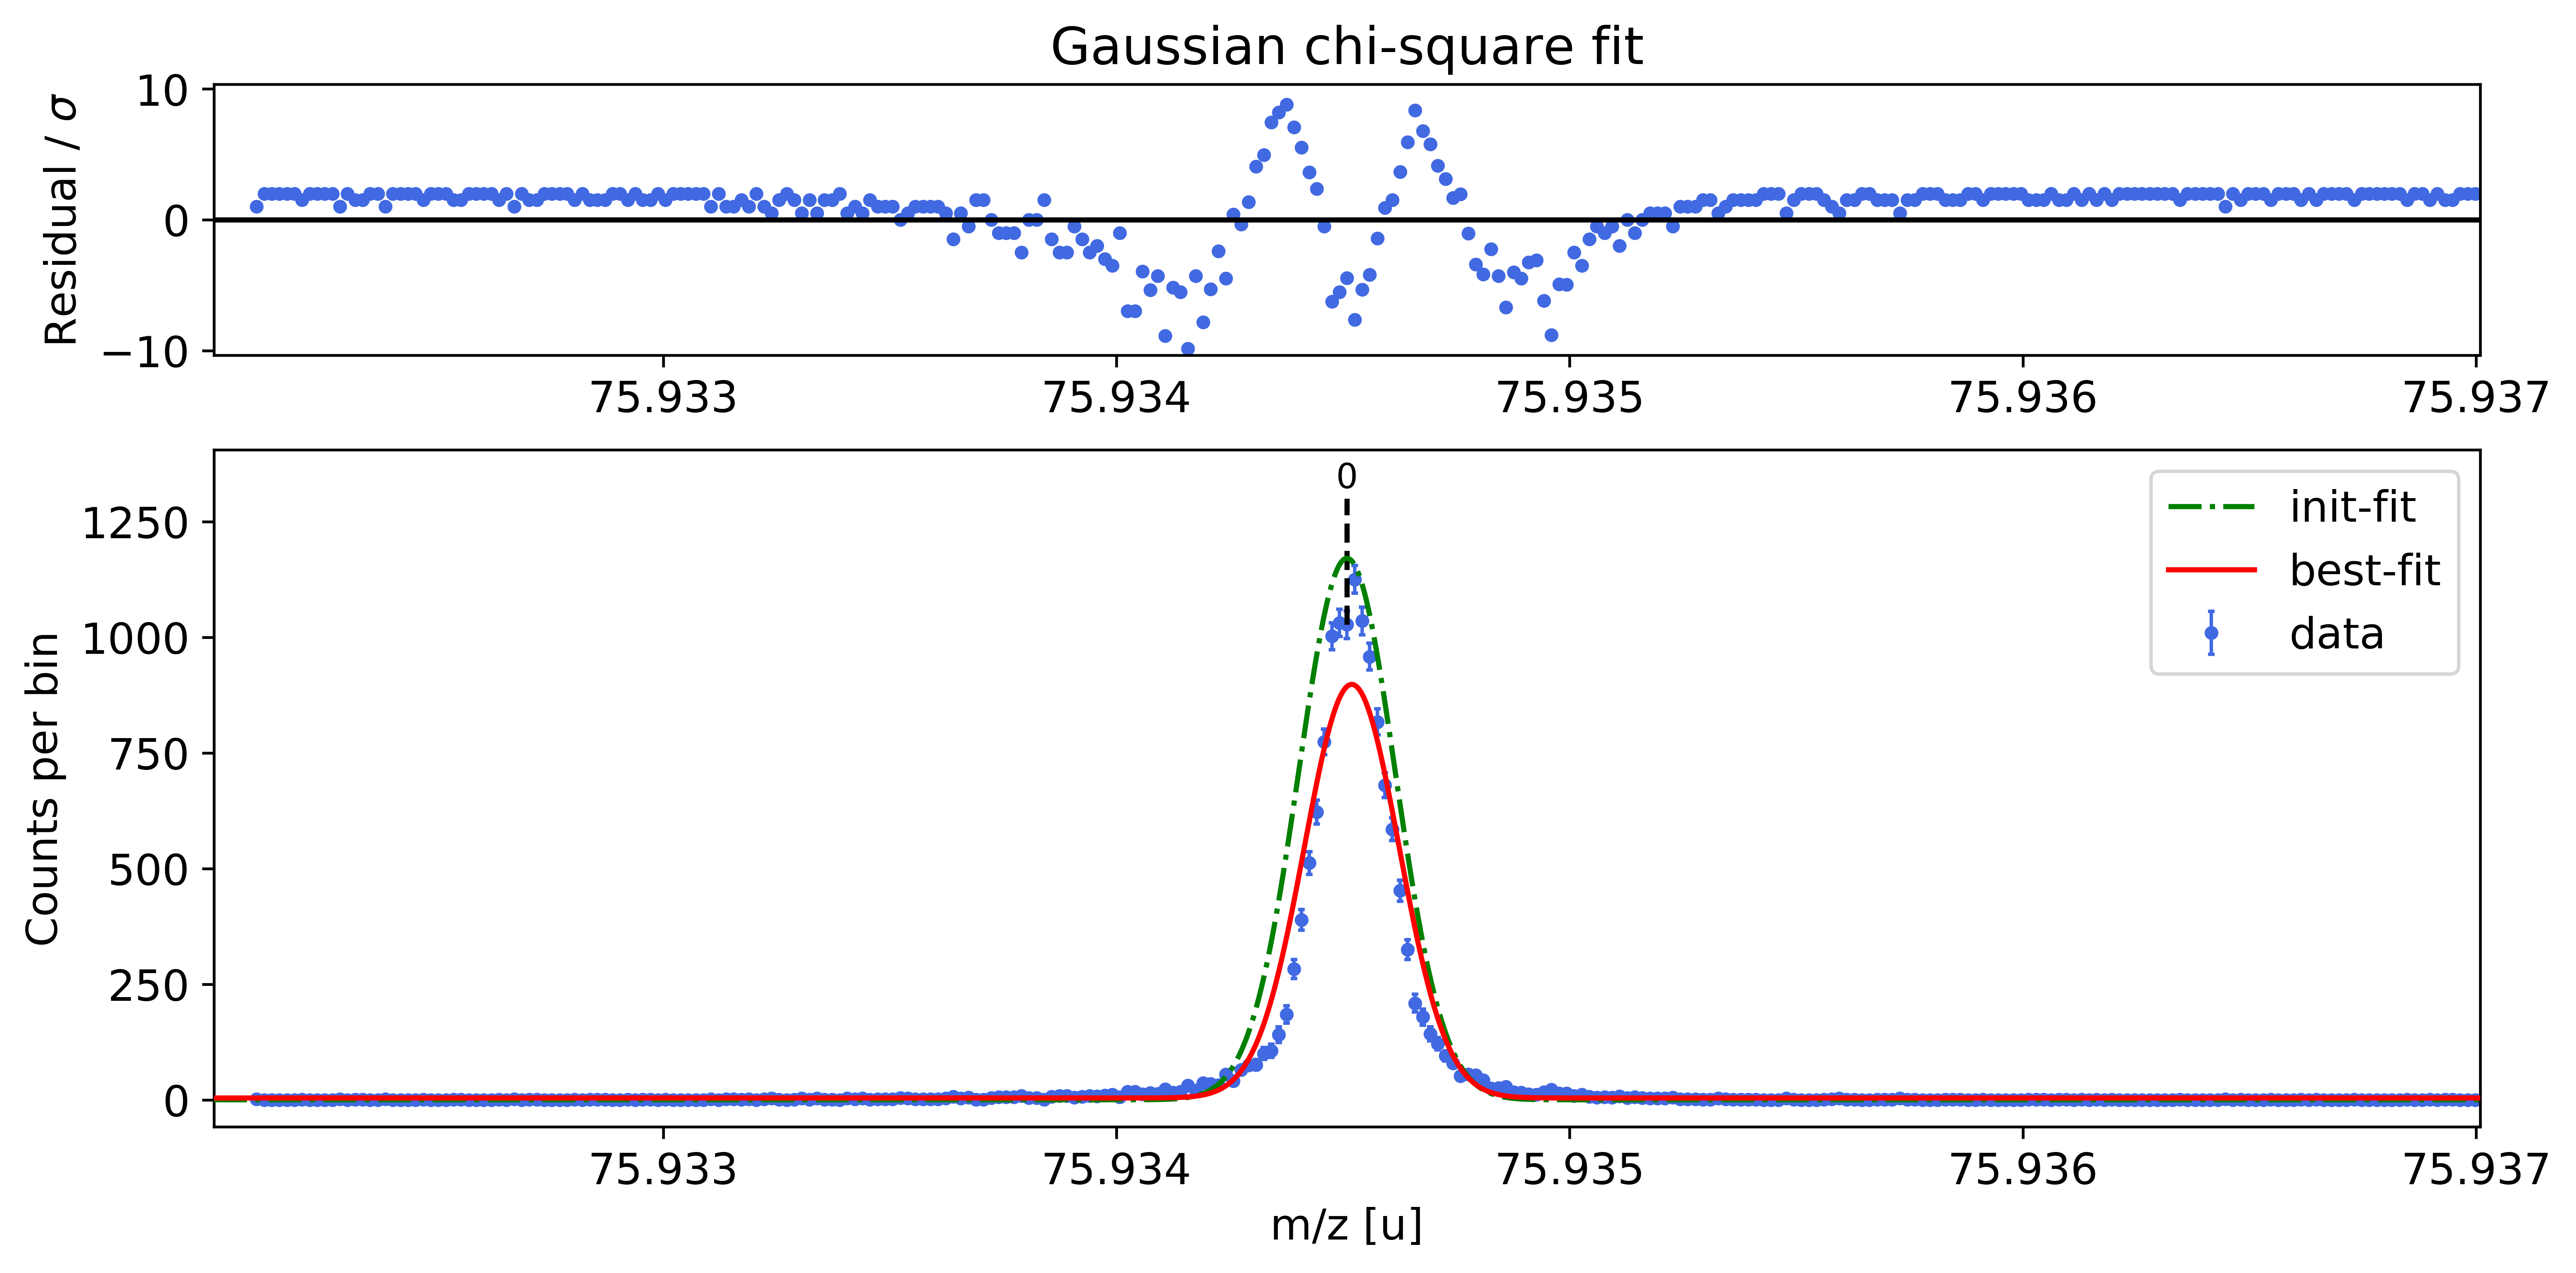


Gaussian-fit yields reduced chi-square of: 7.89 +- 0.08


### Fitting data with emg01 ###---------------------------------------------------------------------------------------------



TypeError: expected dtype object, got 'numpy.dtype[float64]'

In [8]:
specdata[0].determine_peak_shape(species_shape_calib="Rb76:-1e", x_fit_range=0.005, fit_model="emg12")

In [ ]:
# From the above results, determine the best center of 